# Métodos de agrupamiento

En este ejercicio, aplicaremos los conceptos vistos en clase referentes a métodos de agrupamiento no supervisados. Específicamente, explorarás el uso de KMeans y DBScan usando la librería de scikit-learn. En la primera sección analizaremos K-means y en la segunda DBScan


## 1. K-means

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
random_state = 0 # Fijamos la semilla aleatoria para que siempre den los mismos datos
np.random.seed(random_state)
# Podemos establecer los colores con los que se graficará con matplotlib
# utilizando un cmap distinto
matplotlib.rc('image', cmap='nipy_spectral')

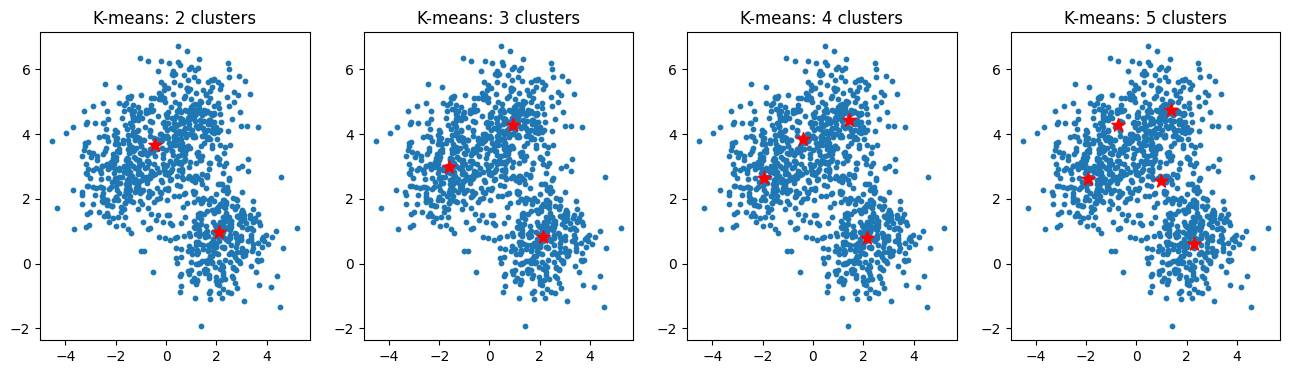

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

random_state = 0  # Fijamos la semilla aleatoria para que siempre den los mismos datos
np.random.seed(random_state)

# Podemos establecer los colores con los que se graficará con matplotlib
# utilizando un cmap distinto
matplotlib.rc('image', cmap='nipy_spectral')

# Generaremos 3 blobs, cada uno con datos iguales. En total habran 1000 puntos distribuidos en estos blobs.
n_samples = 1000
X, _ = datasets.make_blobs(n_samples=n_samples, centers=3, random_state=random_state)

# Utilizaremos el algoritmo de KMeans para encontrar clusters en los datos
n_cols = 4
n_clusters_list = [2, 3, 4, 5]
rows = len(n_clusters_list) // n_cols
fig, axes = plt.subplots(rows, n_cols, figsize=(4 * n_cols, 4))
axes = axes.flatten()

for ax, n_clusters in zip(axes, n_clusters_list):
    # Encuentra los clusters utilizando el algoritmo de KMeans implementado en scikit-learn
    model = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X)

    # Grafica los datos usando scatter, recuerda que X = (x, y)
    ax.scatter(X[:, 0], X[:, 1], s=10)

    # Lee la documentación de sklearn para obtener los centroides del modelo entrenado
    # y grafícalos con ax.scatter
    cluster_centers = model.cluster_centers_
    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='r', marker='*')

    ax.set_title(f"K-means: {n_clusters} clusters")

plt.show()

En la sección anterior utilizamos 2, 3, 4 y 5 clusters para encontar patrones en los datos y los resultados se graficaron.

TODO: Contesta la siguiente pregunta

- ¿Cúal propuesta de clusters consideras la mejor y porqué? La segunda, pareciera que agrupa mejor los datos

## 1.2 Definiendo métricas de evaluación

En el algoritmo de K-means debemos seleccionar la cantidad de clusters para poder hacer fit al modelo. Para decidir cuantos clusters utilizar podemos evaluar visualmente o hacer un análisis cuantitativo. 

Una estrategia común para realizar el análisis consiste en entrenar modelos con multiples propuestas de k-grupos y seleccionar la propuesta con el mejor rendimiento. Para ello se debe utilizar una métrica que evalúe el desempeño del algoritmo.

El ["silhouette score"](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) es una métrica muy útil para este objetivo que consiste en medir la distancia intra-grupo e inter-grupo. Esta métrica considera como buen grupo a aquel que tiene una pequeña distancia promedio intra-grupo y que se encuentra muy separado de los demas grupos. Un acomodo con buenos grupos tendrá un silhoute score cercano a 1 y una mala selección de grupos tendrá un score cercano -1. 

En la siguiente sección seguiremos esta estrategia para determinar la mejor cantidad de grupos en los datos provistos.

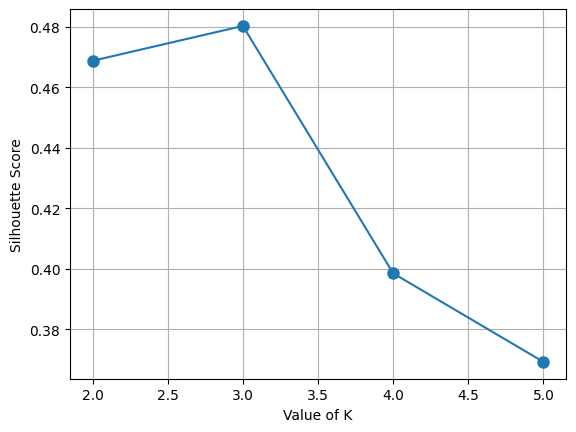

In [3]:
from sklearn.metrics import silhouette_score

Ks = range(2, 6)
scores = []

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

    # Obtain the silhouette score for the K-Means model
    score = silhouette_score(X, kmeans.labels_)

    scores.append(score)

plt.plot(Ks, scores, '-o', markersize=8)
plt.xlabel("Value of K")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

### TODO: Contesta la siguiente pregunta

De acuerdo al silhouete score
- ¿Qué sería mejor, elegir 4 o 5 clusters? 4 clusters parece mejor
- ¿Cuántos clusters se deberían utilizar para entrenar el algoritmo? ¿Concuerda con tu selección realizada tras visualizar los datos? Si, parece que 3 es el numero apropiado

## 1.3 Rompiendo las asunciones de K-Means

K-means es un algoritmo que funciona en base a algunas asunciones que pueden no siempre ser ciertas, en esta seccion analizaremos algunos casos en los cuales el K-means puede que no genere la solución esperada.

In [4]:
n_samples=200
# =============================================================================
# Generamos diferentes conjuntos de datos que rompen las asunciones de K-Means
# =============================================================================
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# Blobs con varianzas variadas
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# Cada dataset es un tuple (datos, etiquetas)
datasets = {"Círculos": noisy_circles,
            "Lunas": noisy_moons, 
            "Blobs": blobs, 
            "Varianzas distintas": varied,
            # "Aleatorio": no_structure,
            "Datos anisotrópicos": aniso}

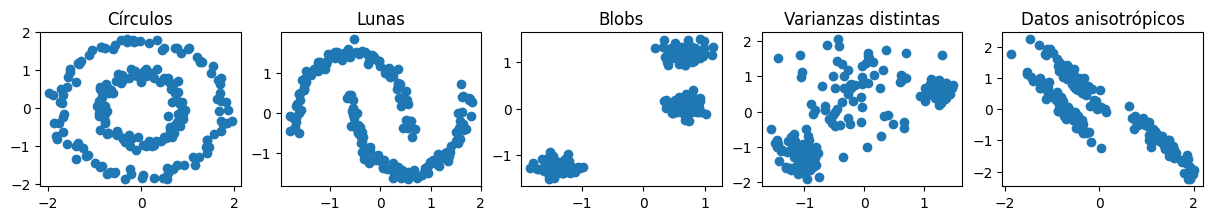

In [5]:
# ============
# Graficamos los datos
# ============

n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()

for (name, data), ax in zip(datasets.items(), axs):
    X, _ = data

    # Normalizamos los datos para que todos estén en la misma escala
    X = StandardScaler().fit_transform(X)

    # Grafica los datos usando scatter
    ax.scatter(X[:, 0], X[:, 1])

    ax.set_title(name)

### Para los conjuntos de datos anteriores...
Aplica K-means a cada uno de los datasets anteriores. Determina los hiperparámetros (k) que resulten en la mejor asignación según tu criterio para cada grupo.
- ¿En que conjunto/os esperas que k-means realice una solución adecuada? El tercero (blobs) 
- ¿Cuales son las asunciones de k-means? que los clusters tiene la misma varianza
- ¿Cual de estos conjuntos NO rompe las asunciones de k-means? blobs

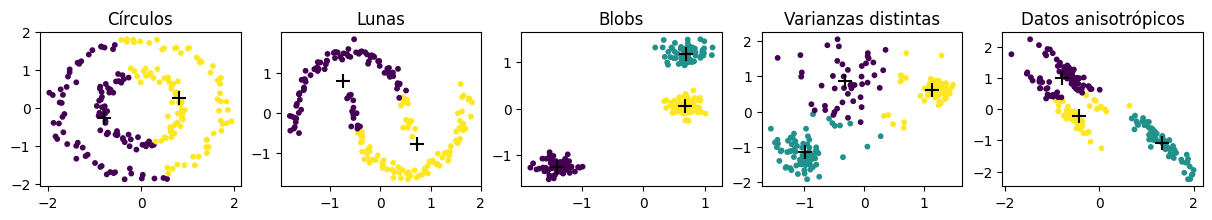

In [6]:
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()

# Modify the number of clusters for each dataset until you find a satisfactory result
n_clusters = {"Circles": 2,
              "Moons": 2,
              "Blobs": 3,
              "Varied": 3,
              "Anisotropic": 3}

for (name, data), n, ax in zip(datasets.items(), n_clusters.values(), axs):
    X, _ = data
    X = StandardScaler().fit_transform(X)
    ax.set_title(name)

    # Apply K-means to find the groups and cluster centers
    # Modify the hyperparameters in n_clusters as appropriate for each dataset
    kmeans = KMeans(n_clusters=n, random_state=random_state).fit(X)
    centers = kmeans.cluster_centers_

    ax.scatter(X[:, 0], X[:, 1], s=10, c=kmeans.labels_, cmap='viridis')
    ax.scatter(centers[:, 0], centers[:, 1], marker='+', s=100, c='k')

## 2. DBScan
DBScan es otro método de agrupamiento el cual encuentra grupos que funciona a través de densidad local.
En las siguientes celdas, aplica DBScan a cada uno de los datasets anteriores y compara los resultados con los de K-Means. Ajusta los hiperparámetros según tu criterio para lograr un agrupamiento adecuado.

Clusters in Círculos [-1  0  1  2  3  4  5  6  7  8]
Clusters in Lunas [-1  0  1  2  3  4  5]
Clusters in Blobs [0 1 2]
Clusters in Varianzas distintas [-1  0  1  2  3  4  5]
Clusters in Datos anisotrópicos [-1  0  1]


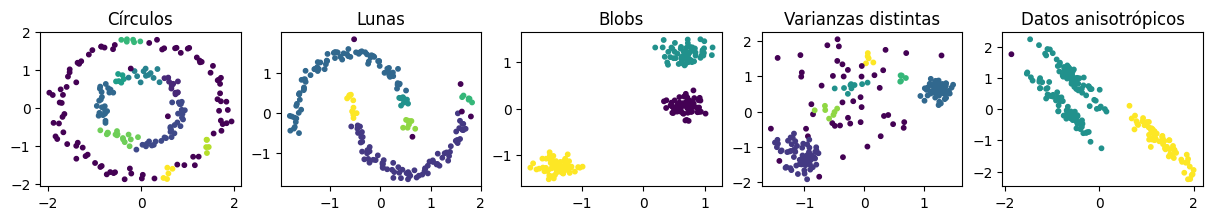

In [8]:
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()

# TODO: Modifica los hiper parámetros de dbscan hasta encontrar un resultado que te satisfaga
params = {"Círculos": {"eps": 0.2, "min_samples": 5},
          "Lunas": {"eps": 0.2, "min_samples": 5},
          "Blobs": {"eps": 0.3, "min_samples": 5},
          "Varianzas distintas": {"eps": 0.2, "min_samples": 5},
          "Datos anisotrópicos": {"eps": 0.5, "min_samples": 5}}

for (name, data), ax in zip(datasets.items(), axs):
    X, _ = data
    X = StandardScaler().fit_transform(X)
    ax.set_title(name)

    if name in params:
        eps = params[name]['eps']
        min_samples = params[name]['min_samples']

        # Apply DBSCAN to find the clusters
        # Modify the hyperparameters as appropriate for each dataset
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)

        print(f"Clusters in {name}", np.unique(clusters))
        ax.scatter(X[:, 0], X[:, 1], s=10, c=clusters, cmap='viridis')
    else:
        print(f"No parameters found for {name}")

### TODO: Contesta la siguientes preguntas
- ¿Qué diferencia encuentras entre los clusters encontrados con DBSCAN y los clusters encontrados con K-Means? DBscan detecta las irregularidades, por eso tuvo mejores resultados en el de varianzas disntintas
- ¿Qué metodo clasifica mejor los clusters de Lunas y a qué crees que se deba? La verdad parecieran tener resultados bastante similares
- ¿Qué son los puntos negros encontrados con DBSCAN? Son anomalias que no son parte del grupo
- ¿En qué casos crees que sea recomendable utilizar K-means sobre DBSCAN? Cuando ya sabes la cantidad de clusters 
- En base a tu experiencia ¿que desventajas notas para DBScan contra K-means? Crea mas grupos de los que hay
- En base a tu experiencia ¿que ventajas notas para DBScan contra K-means? Lo puedes usar sin saber la cantidad de grupos 
- Si entrenamos DBSCAN y queremos buscar un grupo al que pertenezca un punto nuevo, ¿Existe alguna función de sk-learn que nos permita hacer esto?¿Cómo podríamos predecir el grupo al que pertenece un nuevo datapoint? dbscan.predict